In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df_retail_gso = pd.read_csv(r"C:\Users\Admin\Desktop\TANPHAT\hocotruong\Năm ba 2025-2026\HK1_A\Thu thập và tiền xử lý dữ liệu\Đồ_án_GDP\data\processed\Retail_processed.csv.csv")  

In [17]:
df_retail_gso.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          13 non-null     object 
 1   retail_value  13 non-null     float64
dtypes: float64(1), object(1)
memory usage: 340.0+ bytes


In [18]:
# Ép kiểu cột date về datetime
df_retail_gso["date"] = pd.to_datetime(df_retail_gso["date"], errors="coerce")
df_retail_gso = df_retail_gso[
        (df_retail_gso['date'].dt.year >= 2010) & 
        (df_retail_gso['date'].dt.year <= 2024)
    ].copy()

In [19]:
df_retail_gso.describe()

,date,retail_value
count,13,13.000000
mean,2018-12-31 03:41:32.307692288,107.071538
min,2012-12-31 00:00:00,101.330000
25%,2015-12-31 00:00:00,105.800000
50%,2018-12-31 00:00:00,107.430000
75%,2021-12-31 00:00:00,109.090000
max,2024-12-31 00:00:00,111.300000
std,NaN,2.835207


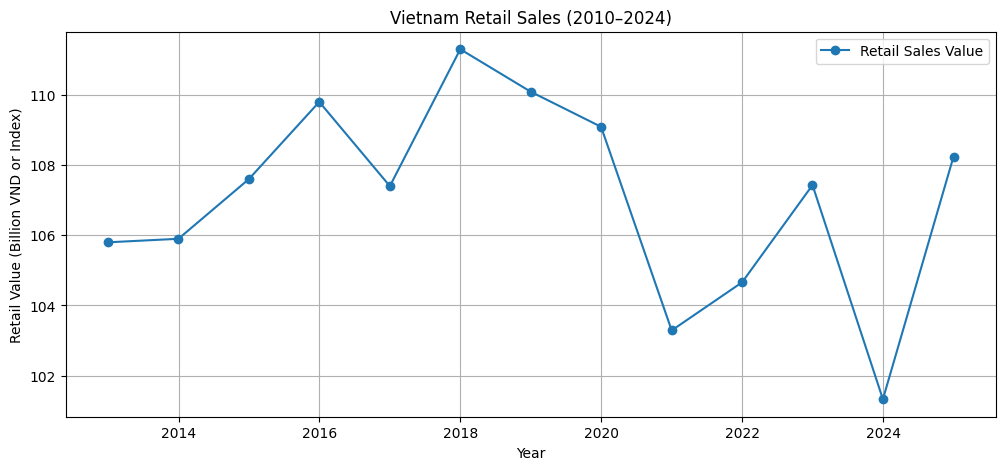

In [20]:
plt.figure(figsize=(12,5))
plt.plot(df_retail_gso['date'], df_retail_gso['retail_value'], marker='o', label='Retail Sales Value')
plt.title('Vietnam Retail Sales (2010–2024)')
plt.xlabel('Year')
plt.ylabel('Retail Value (Billion VND or Index)')
plt.grid(True)
plt.legend()
plt.show()


posx and posy should be finite values
posx and posy should be finite values


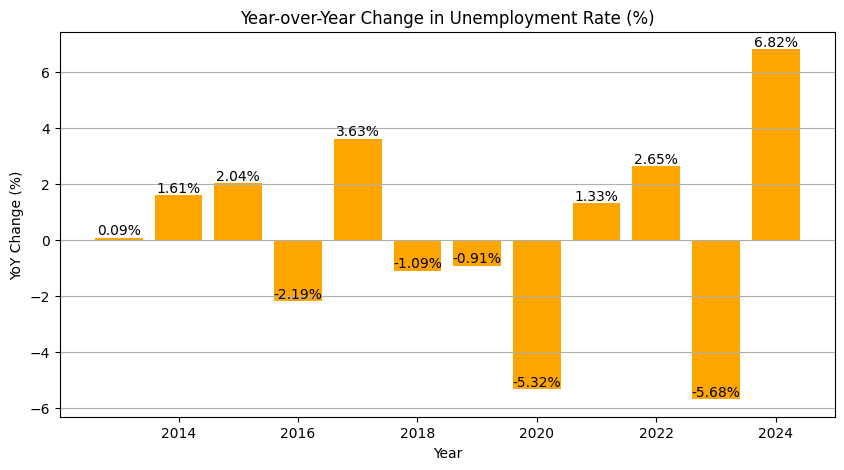

In [ ]:
df_retail_gso['retail_value_yoy'] = df_retail_gso['retail_value'].pct_change() * 100

plt.figure(figsize=(10,5))
bars = plt.bar(df_retail_gso['date'].dt.year, df_retail_gso['retail_value_yoy'], color='orange')
plt.title('Year-over-Year Change in Retail Sales (%)')
plt.xlabel('Year')
plt.ylabel('YoY Change (%)')
plt.grid(True, axis='y')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}%', ha='center', va='bottom')

plt.show()
